In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import scipy.stats as stats

In [2]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the current EPL Season
df = pd.read_csv('data/season-1819.csv')
# Let's look at the last few results to see until which date the data is present
df.tail()

Date     HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
256  2019-02-09  Southampton    Cardiff     1     2   A     0     0   D   
257  2019-02-09      Watford    Everton     1     0   H     0     0   D   
258  2019-02-10     Man City    Chelsea     6     0   H     4     0   H   
259  2019-02-10    Tottenham  Leicester     3     1   H     1     0   H   
260  2019-02-11       Wolves  Newcastle     1     1   D     0     0   D   

        Referee  ...  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
256  M Atkinson  ...    7    3  15  12   8   2   3   3   0   0  
257   L Probert  ...    2    4  21  10   8   2   2   0   0   1  
258      M Dean  ...    9    4   9  13   2   2   1   2   0   0  
259    M Oliver  ...    5    9  11   4   2   9   3   1   0   0  
260     G Scott  ...    6    3   7   9  13   1   1   3   0   0  

[5 rows x 22 columns]

In [4]:
# Ingest previous 10 years EPL data
df_1819 = pd.read_csv('data/season-1819.csv')
df_1718 = pd.read_csv('data/season-1718.csv')
df_1617 = pd.read_csv('data/season-1617.csv')
df_1516 = pd.read_csv('data/season-1516.csv')
df_1415 = pd.read_csv('data/season-1415.csv')
df_1314 = pd.read_csv('data/season-1314.csv')
df_1213 = pd.read_csv('data/season-1213.csv')
df_1112 = pd.read_csv('data/season-1112.csv')
df_1011 = pd.read_csv('data/season-1011.csv')
df_0910 = pd.read_csv('data/season-0910.csv')

In [5]:
# Merge last 10 seasons into a single data frame
df_epl = pd.concat([df_1718, df_1617, df_1516, df_1415, df_1314, df_1213, df_1112, df_1011, df_0910])

In [6]:
# Print the columns
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [7]:
# Details of data types and null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 22 columns):
Date        261 non-null object
HomeTeam    261 non-null object
AwayTeam    261 non-null object
FTHG        261 non-null int64
FTAG        261 non-null int64
FTR         261 non-null object
HTHG        261 non-null int64
HTAG        261 non-null int64
HTR         261 non-null object
Referee     261 non-null object
HS          261 non-null int64
AS          261 non-null int64
HST         261 non-null int64
AST         261 non-null int64
HF          261 non-null int64
AF          261 non-null int64
HC          261 non-null int64
AC          261 non-null int64
HY          261 non-null int64
AY          261 non-null int64
HR          261 non-null int64
AR          261 non-null int64
dtypes: int64(16), object(6)
memory usage: 44.9+ KB


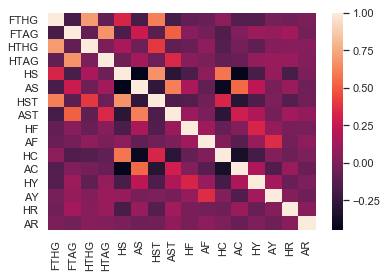

In [8]:
# Correlation Matrix of the dataset, lighter the colors, higher the correlation
sns.set(style='darkgrid')
sns.heatmap(df.corr())

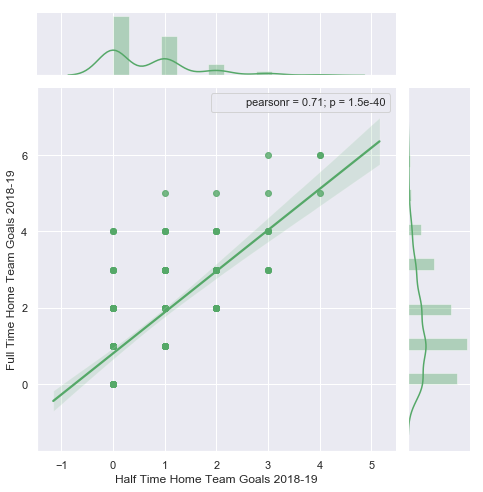

In [9]:
# Jointplot to find correlation between half time goals and full time goals for home teams for 2018-19 season.

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(df.HTHG, df.FTHG, kind='reg', color="g", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Half Time Home Team Goals 2018-19')
plt.ylabel('Full Time Home Team Goals 2018-19')
plt.show('j')

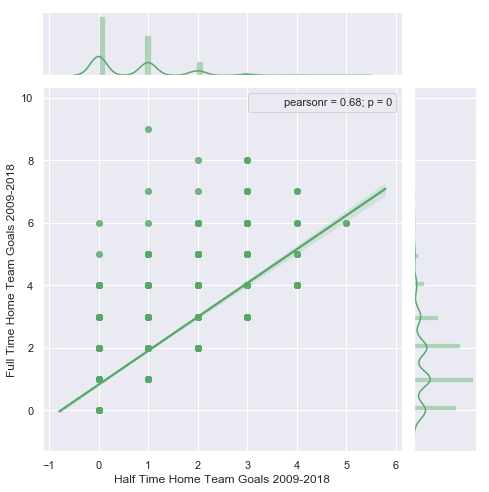

In [10]:
# Jointplot to find correlation between half time goals and full time goals for away teams for 2009-2018 season.

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(df_epl.HTHG, df_epl.FTHG, kind='reg', color="g", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Half Time Home Team Goals 2009-2018')
plt.ylabel('Full Time Home Team Goals 2009-2018')
plt.show('j')

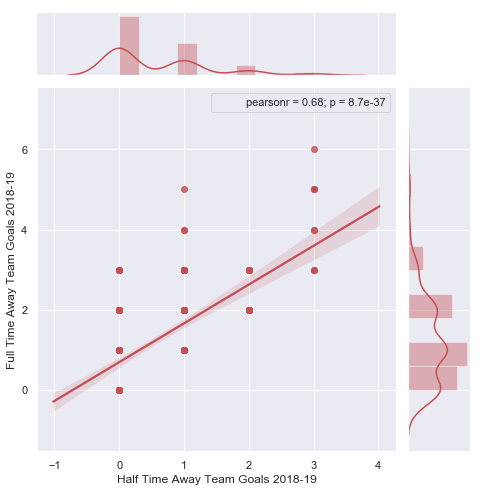

In [11]:
# Jointplot to find correlation between half time goals and full time goals for away teams for 2018-19 season.

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(df.HTAG, df.FTAG, kind='reg', color="r", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Half Time Away Team Goals 2018-19')
plt.ylabel('Full Time Away Team Goals 2018-19')
plt.show('j')

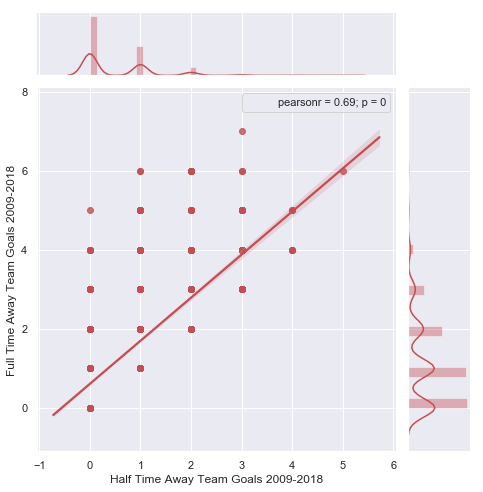

In [12]:
# Jointplot to find correlation between half time goals and full time goals for away teams for 2009-18 season.

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(df_epl.HTAG, df_epl.FTAG, kind='reg', color="r", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Half Time Away Team Goals 2009-2018')
plt.ylabel('Full Time Away Team Goals 2009-2018')
plt.show('j')

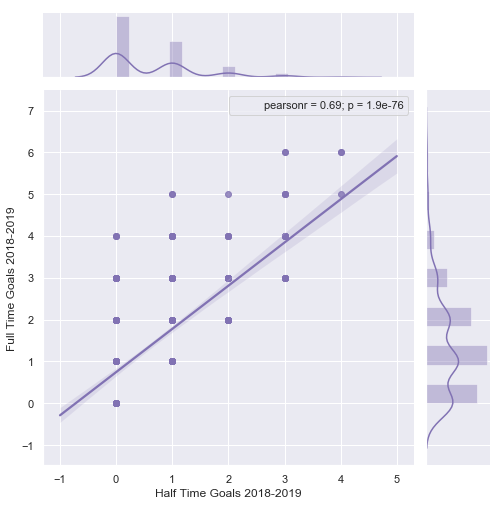

In [13]:
# Jointplot to find correlation between half time goals and full time goals for 2018-19 season.

half_time_goals = pd.concat([df['HTHG'], df['HTAG']])
full_time_goals = pd.concat([df['FTHG'], df['FTAG']])
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(half_time_goals, full_time_goals, kind='reg', color="m", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Half Time Goals 2018-2019')
plt.ylabel('Full Time Goals 2018-2019')
plt.show('j')

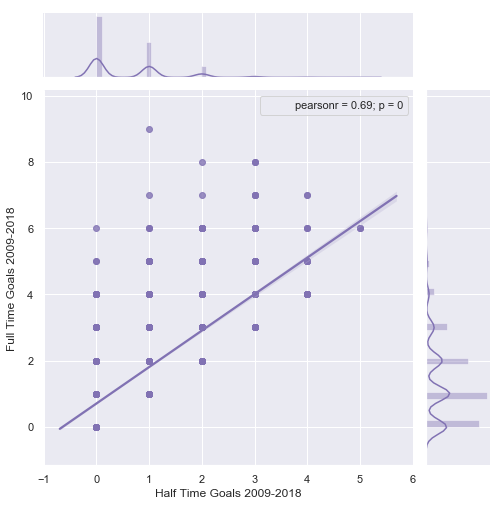

In [14]:
# Jointplot to find correlation between half time goals and full time goals for 2009-18 season.

half_time_goals = pd.concat([df_epl['HTHG'], df_epl['HTAG']])
full_time_goals = pd.concat([df_epl['FTHG'], df_epl['FTAG']])
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(half_time_goals, full_time_goals, kind='reg', color="m", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Half Time Goals 2009-2018')
plt.ylabel('Full Time Goals 2009-2018')
plt.show('j')

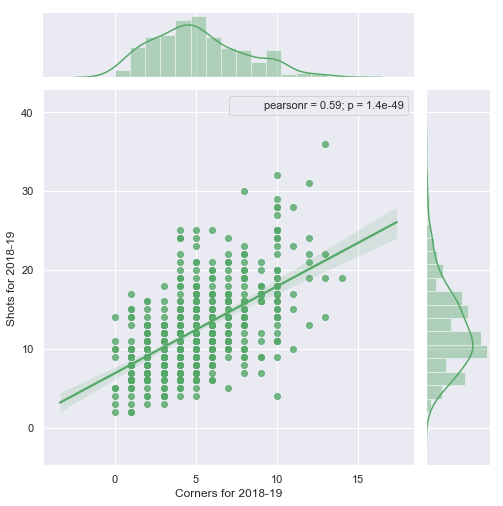

In [15]:
# Corners and Shot dependence for 2018-19 season

corners = pd.concat([df['HC'], df['AC']])
shots = pd.concat([df['HS'], df['AS']])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(corners, shots, kind='reg', color="g", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Corners for 2018-19')
plt.ylabel('Shots for 2018-19')
plt.show('j')

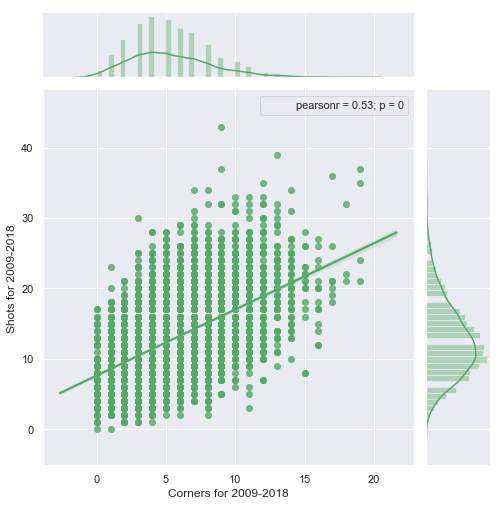

In [16]:
# Corners and Shot dependence for 2009-18 season

corners = pd.concat([df_epl['HC'], df_epl['AC']])
shots = pd.concat([df_epl['HS'], df_epl['AS']])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(corners, shots, kind='reg', color="g", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Corners for 2009-2018')
plt.ylabel('Shots for 2009-2018')
plt.show('j')

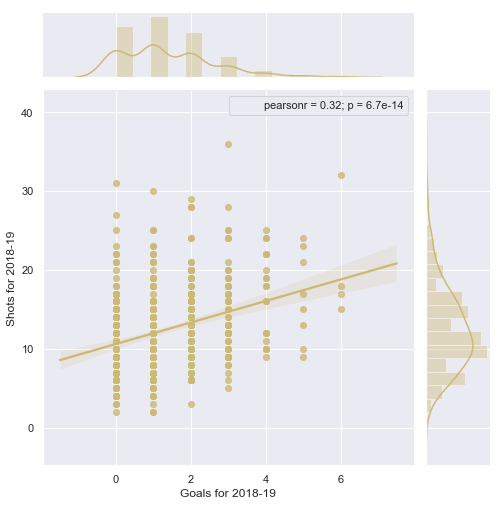

In [17]:
# Goals and Shots correlation for 2018-19 season

goals = pd.concat([df['FTHG'], df['FTAG']])
shots = pd.concat([df['HS'], df['AS']])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(goals, shots, kind='reg', color="y", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Goals for 2018-19')
plt.ylabel('Shots for 2018-19')
plt.show('j')

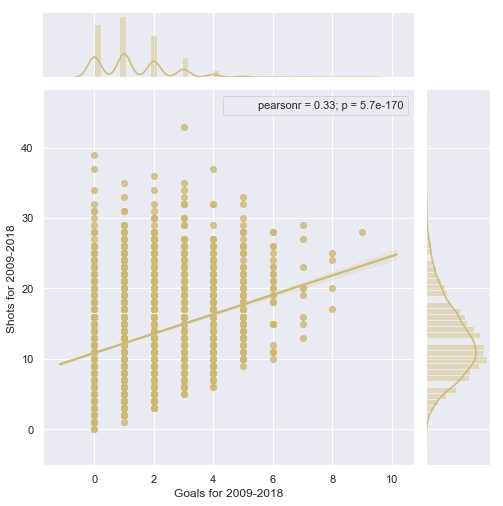

In [18]:
# Goals and Shots correlation for 2009-18 season

goals = pd.concat([df_epl['FTHG'], df_epl['FTAG']])
shots = pd.concat([df_epl['HS'], df_epl['AS']])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(goals, shots, kind='reg', color="y", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Goals for 2009-2018')
plt.ylabel('Shots for 2009-2018')
plt.show('j')

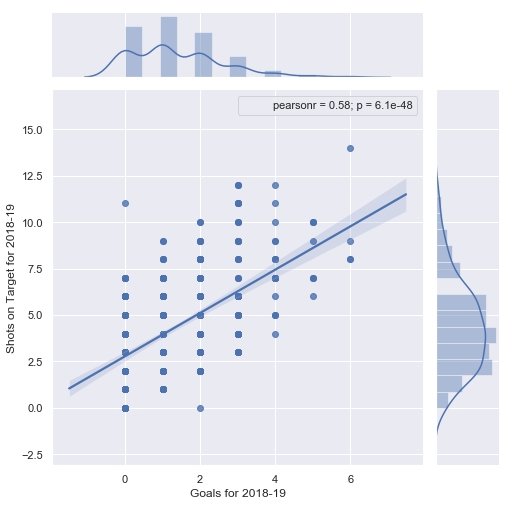

In [19]:
# Goals and Shots on Target correlation for 2018-19 season

goals = pd.concat([df['FTHG'], df['FTAG']])
shots_target = pd.concat([df['HST'], df['AST']])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(goals, shots_target, kind='reg', color="b", height=7)
j.annotate(stats.pearsonr)
plt.xlabel('Goals for 2018-19')
plt.ylabel('Shots on Target for 2018-19')
plt.show('j')

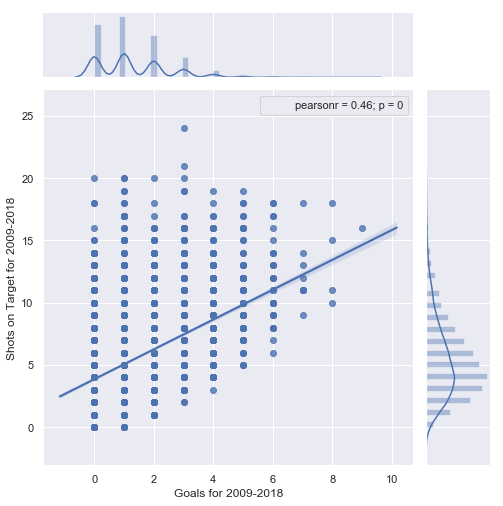

In [20]:
# Goals and Shots on Target correlation for 2009-18 season

goals = pd.concat([df_epl['FTHG'], df_epl['FTAG']])
shots_target = pd.concat([df_epl['HST'], df_epl['AST']])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(goals, shots_target, kind='reg', color="b", height = 7)
j.annotate(stats.pearsonr)
plt.xlabel('Goals for 2009-2018')
plt.ylabel('Shots on Target for 2009-2018')
plt.show('j')

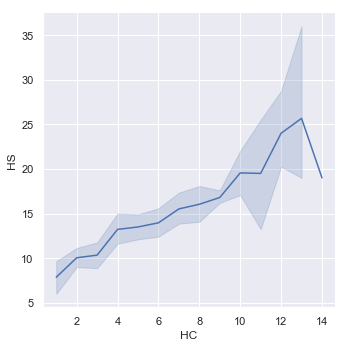

In [21]:
# Relational plot between Corners and Shots

sns.set(style="darkgrid", color_codes=True)
sns.relplot(x='HC', y='HS', data=df, kind='line')

In [22]:
# Heatmap of 2018-19 results based on Goals scored by Home and Away teams

temp_df = df.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'L')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'W')

c1 = alt.Chart(temp_df).mark_rect().encode(
    alt.X('FTHG:N', title="Home Goals"),
    alt.Y('FTR', title="Result"),
    alt.Color('count()', scale=alt.Scale(scheme='plasma'), legend=alt.Legend(title="Records")),
)

temp_df = df.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'W')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'L')

c2 = alt.Chart(temp_df).mark_rect().encode(
    alt.X('FTAG:N', title="Away Goals"),
    alt.Y('FTR', title="Result"),
    alt.Color('count()', scale=alt.Scale(scheme='plasma')),
)

In [23]:
chart = c1 & c2
chart = chart.properties(title = 'Heatmap of PL 2018-19 results based on Home/Away Goals')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=10, offset=10))
chart = chart.configure_legend(titleFontSize=6)
chart = chart.configure_axis(titleFontSize=8)

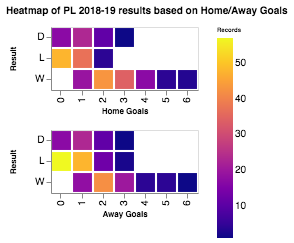

In [24]:
chart

In [26]:
alt.themes.enable('opaque')
chart.save('plots/heatmap_results_201819.png', scale_factor=7.0)

In [27]:
# Heatmap of scorelines from 2018-19 season 

temp_df = df.copy()

chart = alt.Chart(temp_df).mark_rect().encode(
    alt.X('FTHG:N', title="Home Goals"),
    alt.Y('FTAG:N', title="Away Goals", sort='descending'),
    alt.Color('count()', scale=alt.Scale(scheme='plasma'), legend=alt.Legend(title="Records")),
)

In [28]:
chart = chart.properties(title = 'Heatmap of Premier League Scoreline for 2018-19 season')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=10, offset=10))
chart = chart.configure_legend(titleFontSize=6)
chart = chart.configure_axis(titleFontSize=8)

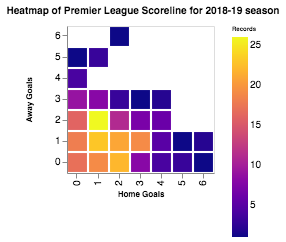

In [29]:
chart

In [30]:
alt.themes.enable('opaque')
chart.save('plots/heatmap_scoreline_201819.png', scale_factor=7.0)

In [31]:
# Heatmap of 2009-18 results based on Goals scored by Home and Away teams

temp_df = df_epl.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'L')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'W')
c1 = alt.Chart(temp_df).mark_rect().encode(
    alt.X('FTHG:N', title="Home Goals"),
    alt.Y('FTR', title="Result"),
    alt.Color('count()', scale=alt.Scale(scheme='plasma'), legend=alt.Legend(title="Records")),
)

temp_df = df_epl.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'W')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'L')
c2 = alt.Chart(temp_df).mark_rect().encode(
    alt.X('FTAG:N', title="Away Goals"),
    alt.Y('FTR', title="Result"),
    alt.Color('count()', scale=alt.Scale(scheme='plasma')),
)

In [32]:
chart = c1 & c2
chart = chart.properties(title = 'Heatmap of PL 2009-18 results based on Home/Away Goals')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=10, offset=10))
chart = chart.configure_legend(titleFontSize=6)
chart = chart.configure_axis(titleFontSize=8)

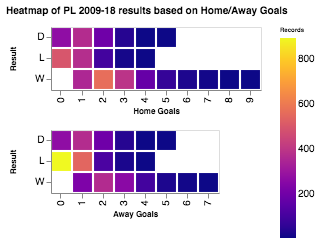

In [33]:
chart

In [34]:
alt.themes.enable('opaque')
chart.save('plots/heatmap_results_overall.png', scale_factor=7.0)

In [35]:
# Heatmap of scorelines from 2009-18 seasons

temp_df = df_epl.copy()

chart = alt.Chart(temp_df).mark_rect().encode(
    alt.X('FTHG:N', title="Home Goals"),
    alt.Y('FTAG:N', title="Away Goals", sort='descending'),
    alt.Color('count()', scale=alt.Scale(scheme='plasma'), legend=alt.Legend(title="Records")),
)

In [36]:
chart = chart.properties(title = 'Heatmap of Premier League Scoreline for 2009-18 season')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=10, offset=10))
chart = chart.configure_legend(titleFontSize=6)
chart = chart.configure_axis(titleFontSize=8)

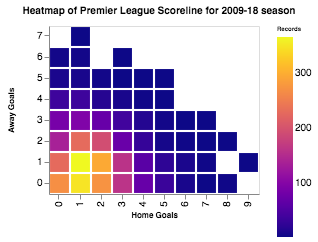

In [37]:
chart

In [38]:
alt.themes.enable('opaque')
chart.save('plots/heatmap_scoreline_overall.png', scale_factor=7.0)

In [39]:
# Home and Away Result distribution with Half-time results. How likely is a comeback?

temp_df = df.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'Away')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'Home')
temp_df['FTR'] = temp_df['FTR'].str.replace('D', 'Draw')
temp_df['HTR'] = temp_df['HTR'].str.replace('A', 'Away')
temp_df['HTR'] = temp_df['HTR'].str.replace('H', 'Home')
temp_df['HTR'] = temp_df['HTR'].str.replace('D', 'Draw')


chart = alt.Chart(temp_df).mark_bar().encode(
    alt.X('count()'),
    alt.Y('FTR', title="Full Time Result"),
        alt.Color('HTR', legend=alt.Legend(title="Half Time Results")),
)

In [40]:
chart = chart.properties(title = 'Is it easy to comeback in the Premier League in 2018-19 season? A Home-Away perspective')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=10, offset=10))
chart = chart.configure_legend(titleFontSize=6)
chart = chart.configure_axis(titleFontSize=8)

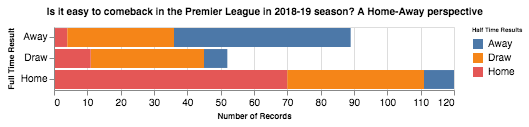

In [41]:
chart

In [42]:
alt.themes.enable('opaque')
chart.save('plots/comeback_201819.png', scale_factor=7.0)

In [43]:
# Home and Away Result distribution with Half-time results. How likely is a comeback?

temp_df = df_epl.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'Away')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'Home')
temp_df['FTR'] = temp_df['FTR'].str.replace('D', 'Draw')
temp_df['HTR'] = temp_df['HTR'].str.replace('A', 'Away')
temp_df['HTR'] = temp_df['HTR'].str.replace('H', 'Home')
temp_df['HTR'] = temp_df['HTR'].str.replace('D', 'Draw')

chart = alt.Chart(df_epl).mark_bar().encode(
    alt.X('count()'),
    alt.Y('FTR', title="Full Time Result"),
    alt.Color('HTR', legend=alt.Legend(title="Half Time Results"))
)

In [44]:
chart = chart.properties(title = 'Was it easy to comeback in the Premier League in 2009-18 seasons? A Home-Away perspective')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=10, offset=10))
chart = chart.configure_legend(titleFontSize=6)
chart = chart.configure_axis(titleFontSize=8)

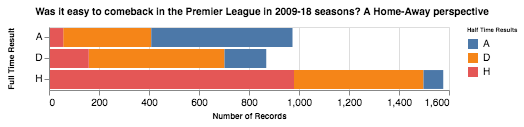

In [45]:
chart

In [46]:
alt.themes.enable('opaque')
chart.save('plots/comeback_overall.png', scale_factor=7.0)

In [58]:
# Distribution of wins, draws, and losses for all teams for 2018-19 season
# Home Team Chart

temp_df = df.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'L')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'W')
chart_home = alt.Chart(temp_df).mark_bar().encode(
    alt.X('count(FTR)', title="Number of Games"),
    alt.Y('HomeTeam:N', title="Home"),
    color=alt.Color('FTR', sort=['W','L', 'D'], scale=alt.Scale(
            domain=['W', 'L', 'D'],
            range=['#32CD32', '#CD5C5C', 'orange']))
)

In [59]:
# Away Team Chart 

temp2_df = df.copy()
temp2_df['FTR'] = temp2_df['FTR'].str.replace('A', 'W')
temp2_df['FTR'] = temp2_df['FTR'].str.replace('H', 'L')
chart_away = alt.Chart(temp2_df).mark_bar().encode(
    alt.X('count(FTR)', title="Number of Games"),
    alt.Y('AwayTeam:N', title="Away"),
    color=alt.Color('FTR', sort=['W','L', 'D'], scale=alt.Scale(
            domain=['W', 'L', 'D'],
            range=['#32CD32', '#CD5C5C', 'orange']), legend=alt.Legend(
            title="Full Time Results"))
)

In [77]:
chart = chart_home | chart_away
chart = chart.properties(title = 'Distribution of results for Premier League teams in the 2018-19 season: A Home-Away perspective')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=15, offset=10, fontWeight='normal'))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

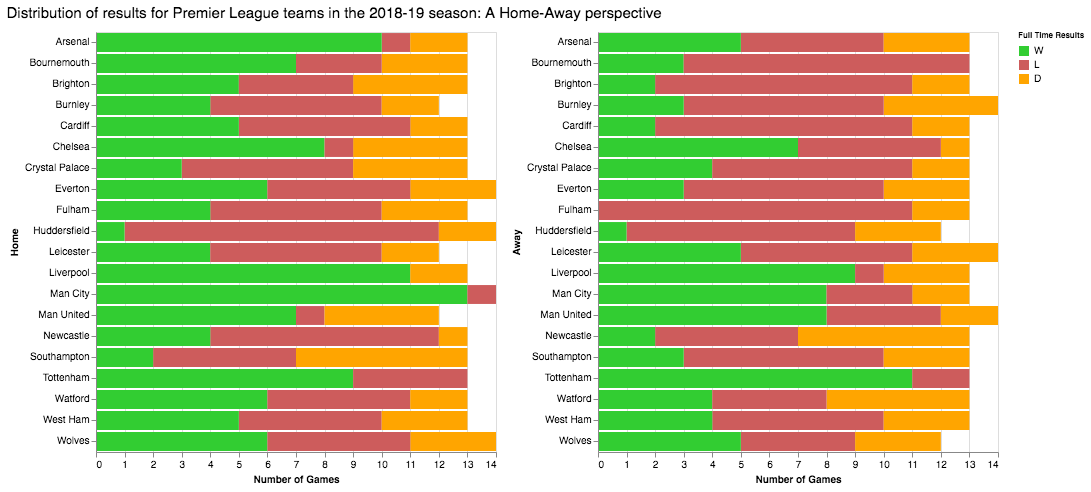

In [78]:
chart

In [141]:
# Distribution of wins, draws, and losses for all teams for 2018-19 season
# Home Team Chart

temp_df = df.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'L')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'W')
chart_home = alt.Chart(temp_df).mark_bar().encode(
    alt.X('count(FTR)', title="Number of Games"),
    alt.Y('HomeTeam:N', title="Home"),
    color=alt.Color('FTR', sort=['W','L', 'D'])
)

In [142]:
# Away Team Chart 

temp2_df = df.copy()
temp2_df['FTR'] = temp2_df['FTR'].str.replace('A', 'W')
temp2_df['FTR'] = temp2_df['FTR'].str.replace('H', 'L')
chart_away = alt.Chart(temp2_df).mark_bar().encode(
    alt.X('count(FTR)', title="Number of Games"),
    alt.Y('AwayTeam:N', title="Away"),
    color=alt.Color('FTR', sort=['W','L', 'D'], legend=alt.Legend(
            title="Full Time Results"))
)

In [143]:
chart = chart_home | chart_away
chart = chart.properties(title = 'Distribution of results for Premier League teams in the 2018-19 season: A Home-Away perspective')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=15, offset=10, fontWeight='normal'))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

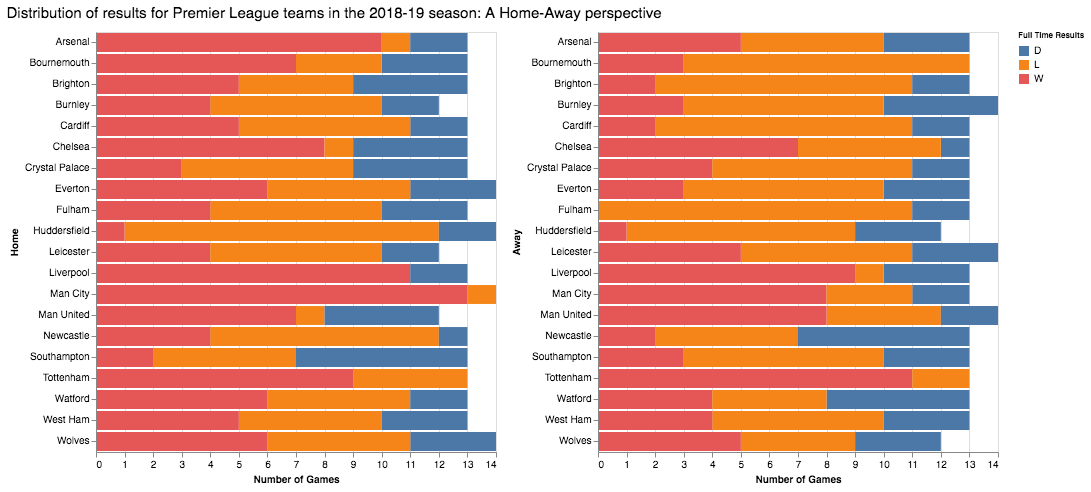

In [144]:
chart

In [145]:
alt.themes.enable('opaque')
chart.save('plots/home_away_201819_color.png', scale_factor=7.0)

In [79]:
alt.themes.enable('opaque')
chart.save('plots/home_away_201819.png', scale_factor=7.0)

In [135]:
# Distribution of wins, draws, and losses for all teams for 2009-18 season
# Home Team Chart

temp_df = df_epl.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'L')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'W')
temp_df.loc[temp_df['FTR']=='W','Wins'] = 1
temp_df.loc[temp_df['FTR']=='L','Wins'] = 0
temp_df.loc[temp_df['FTR']=='D','Wins'] = 0

chart_home = alt.Chart(temp_df).mark_bar().encode(
    alt.X('count(FTR)', title="Number of Games"),
    alt.Y('HomeTeam:N', title="Home", sort=alt.Sort(field="Wins", op="sum", order="descending")),
    color=alt.Color('FTR', sort=['W','L', 'D'], scale=alt.Scale(
            domain=['W', 'L', 'D'],
            range=['#32CD32', '#CD5C5C', 'orange']))
)

In [136]:
# Away Team Chart 

temp2_df = df_epl.copy()
temp2_df['FTR'] = temp2_df['FTR'].str.replace('A', 'W')
temp2_df['FTR'] = temp2_df['FTR'].str.replace('H', 'L')
temp2_df.loc[temp2_df['FTR']=='W','Wins'] = 1
temp2_df.loc[temp2_df['FTR']=='L','Wins'] = 0
temp2_df.loc[temp2_df['FTR']=='D','Wins'] = 0



chart_away = alt.Chart(temp2_df).mark_bar().encode(
    alt.X('count(FTR)', title="Number of Games"),
    alt.Y('AwayTeam:N', title="Away", sort=alt.Sort(field="Wins", op="sum", order="descending")),
    color=alt.Color('FTR', sort=['W','L', 'D'], scale=alt.Scale(
            domain=['W', 'L', 'D'],
            range=['#32CD32', '#CD5C5C', 'orange']), legend=alt.Legend(
            title="Full Time Results"))
)

In [137]:
chart = chart_home | chart_away
chart = chart.properties(title = 'Distribution of results for Premier League teams from 2009-18 season: A Home-Away perspective')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=15, offset=10, fontWeight='normal'))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

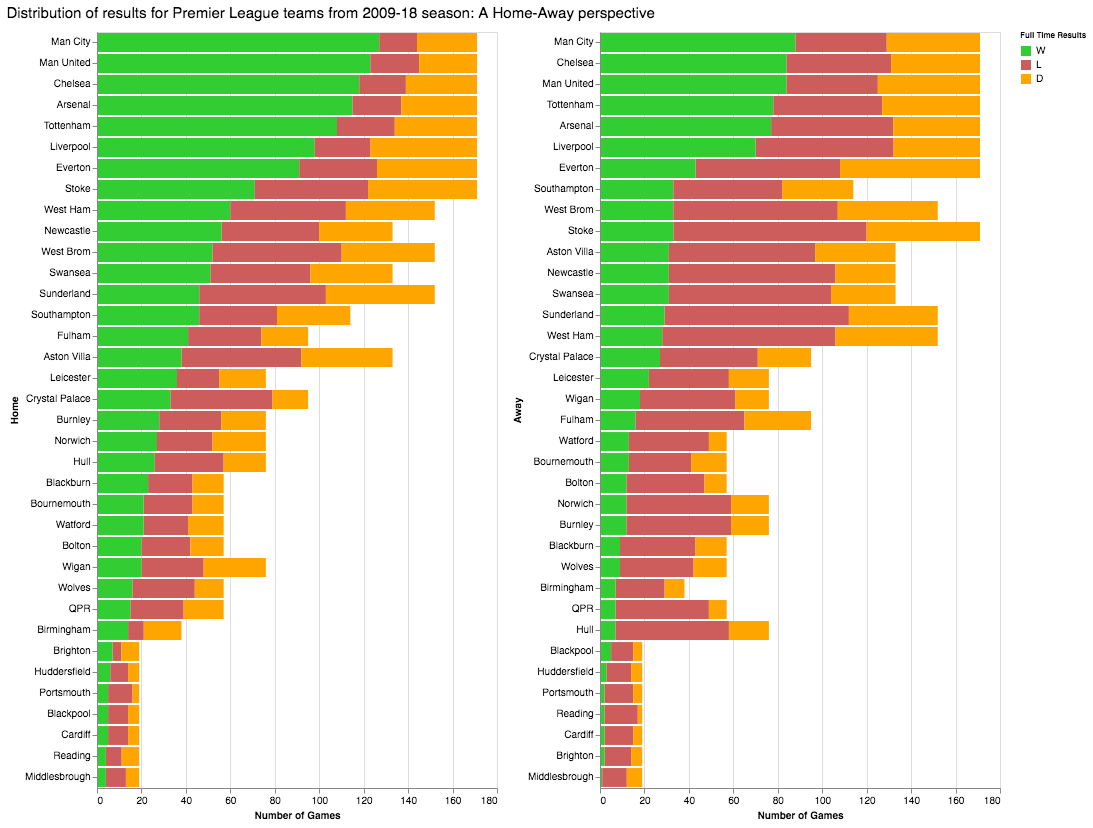

In [139]:
chart

In [140]:
alt.themes.enable('opaque')
chart.save('plots/home_away_overall.png', scale_factor=7.0)

In [ ]:
referee = df.copy()
referee['FTR'] = referee['FTR'].str.replace('A', 'W')
referee['FTR'] = referee['FTR'].str.replace('H', 'W')

In [ ]:
alt.Chart(referee).mark_bar().encode(
    alt.X('Referee:N', sort=alt.Sort(field="Referee:N", op="count", order='descending')),
    y='count()',
    color='FTR'
)

In [ ]:
bar = alt.Chart(referee).mark_bar().encode(
    alt.X('Referee:N', sort=alt.Sort(field="HY", op="average", order='descending')),
    y='average(HY)',
)

rule = alt.Chart(referee).mark_rule(color='red').encode(
    y='mean(HY):Q'
)

(bar + rule)

In [ ]:
mancity_home_df = df[df['HomeTeam']=='Man City']
mancity_away_df = df[df['AwayTeam']=='Man City']

In [ ]:
alt.themes.enable('opaque')

alt.Chart(mancity_home_df).mark_bar().encode(
    x=alt.X('FTHG', title='Man City Goals Scored at Home', scale=alt.Scale(domain=[0,6]), axis=alt.Axis(tickCount=6)),
    y='AwayTeam',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
) | alt.Chart(mancity_home_df).mark_bar().encode(
    x=alt.X('FTAG', title='Man City Goals Conceded at Home', scale=alt.Scale(domain=[0,6]), axis=alt.Axis(tickCount=6)),
    y='AwayTeam',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
)

In [ ]:
alt.themes.enable('opaque')

alt.Chart(mancity_away_df).mark_bar().encode(
    x=alt.X('FTAG', title='Man City Goals Scored Away from Home', scale=alt.Scale(domain=[0,6]), axis=alt.Axis(tickCount=6)),
    y='HomeTeam',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
) | alt.Chart(mancity_away_df).mark_bar().encode(
    x=alt.X('FTHG', title='Man City Goals Conceded Away from Home', scale=alt.Scale(domain=[0,6]), axis=alt.Axis(tickCount=6)),
    y='HomeTeam',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
)

In [ ]:
liverpool_home_df = df[df['HomeTeam']=='Liverpool']
liverpool_away_df = df[df['AwayTeam']=='Liverpool']

In [ ]:
alt.themes.enable('opaque')

alt.Chart(liverpool_home_df).mark_bar().encode(
    x=alt.X('FTHG', title='Man City Goals Scored at Home', scale=alt.Scale(domain=[0,6]), axis=alt.Axis(tickCount=6)),
    y='AwayTeam',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
) | alt.Chart(liverpool_home_df).mark_bar().encode(
    x=alt.X('FTAG', title='Man City Goals Conceded at Home', scale=alt.Scale(domain=[0,6]), axis=alt.Axis(tickCount=6)),
    y='AwayTeam',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
)

In [ ]:
alt.themes.enable('opaque')

alt.Chart(liverpool_away_df).mark_bar().encode(
    x=alt.X('FTAG', title='Liverpool Goals Scored Away from Home', scale=alt.Scale(domain=[0,6]), axis=alt.Axis(tickCount=6)),
    y='HomeTeam',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
) | alt.Chart(liverpool_away_df).mark_bar().encode(
    x=alt.X('FTHG', title='Liverpool Goals Conceded Away from Home', scale=alt.Scale(domain=[0,6]), axis=alt.Axis(tickCount=6)),
    y='HomeTeam',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
)

In [ ]:
epl_df